# Task 3: K-Means Clustering

## Library

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Load Data

In [3]:
# Load Data
DATA_DIR = "data"
os.makedirs(DATA_DIR, exist_ok=True)

data_path = os.path.join(DATA_DIR, "Stock Prices Data Set.csv")
data = pd.read_csv(data_path)

In [4]:
print("Stock Prices Data Shape:", data.shape)

Stock Prices Data Shape: (497472, 7)


In [5]:
print("Stock Prices Data Preview:")
display(data.head())

Stock Prices Data Preview:


,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


## Preprocesing

In [6]:
# Keep a copy of the original data before preprocessing
data_original = data.copy()

In [7]:
# Drop non-numeric columns
data_numeric = data.drop(columns=["symbol", "date"], errors='ignore')

In [8]:
# Check if there are NaN values in data_numeric
print("Missing values per column before handling NaN:")
print(data_numeric.isnull().sum())

Missing values per column before handling NaN:
open      11
high       8
low        8
close      0
volume     0
dtype: int64


In [9]:
# Removing rows that contain NaN
data_numeric = data_numeric.dropna()

In [10]:
# Recheck if there is still NaN after handling
print("Missing values per column after handling NaN:")
print(data_numeric.isnull().sum())

Missing values per column after handling NaN:
open      0
high      0
low       0
close     0
volume    0
dtype: int64


In [11]:
numeric_cols = data_numeric.select_dtypes(include=[np.number]).columns.tolist()

In [12]:
# Synchronize data_cleaned with the index of data_numeric
data_cleaned = data.loc[data_numeric.index].copy()

In [13]:
# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

In [14]:
# Make sure the scaling result does not contain NaN
print("Total NaN after scaling:", np.isnan(data_scaled).sum())

Total NaN after scaling: 0


## Determine Optimal

In [15]:
# Determine optimal clusters using Elbow Method
wcss = []  # Within-cluster sum of squares
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

## Elbow Method Visualization

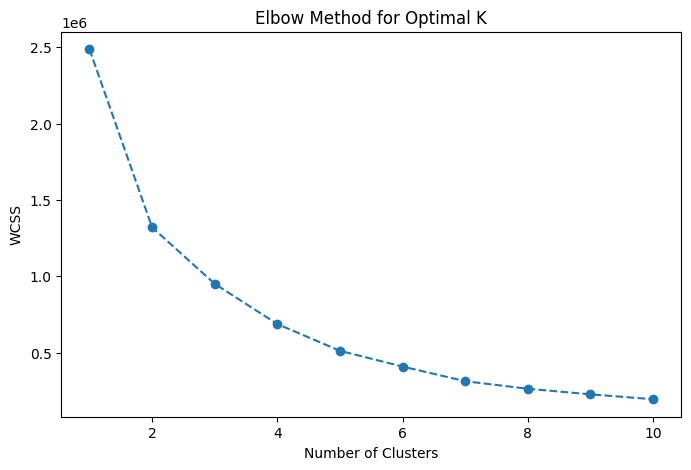

In [16]:
# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

In [17]:
# Elbow Method Visualization (Interactive)
fig_elbow = px.line(
    x=list(K_range), 
    y=wcss, 
    markers=True, 
    title="Elbow Method for Optimal K",
    labels={"x": "Number of Clusters", "y": "WCSS"}
)
fig_elbow.update_traces(mode="markers+lines", marker=dict(size=8))
fig_elbow.show()

## Train & Test

In [18]:
# Apply K-Means with optimal K (to be chosen based on elbow method)
optimal_k = 3  # Replace according to elbow method results
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Apply clustering on data_cleaned
data_cleaned['Cluster'] = kmeans.fit_predict(data_scaled)

# Synchronize clustering results back to original data_original
data_original = data_original.merge(data_cleaned[['Cluster']], how='left', left_index=True, right_index=True)

## PCA Visualization

In [19]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

# Save PCA result to data_cleaned
data_cleaned['PCA1'] = pca_result[:, 0]
data_cleaned['PCA2'] = pca_result[:, 1]

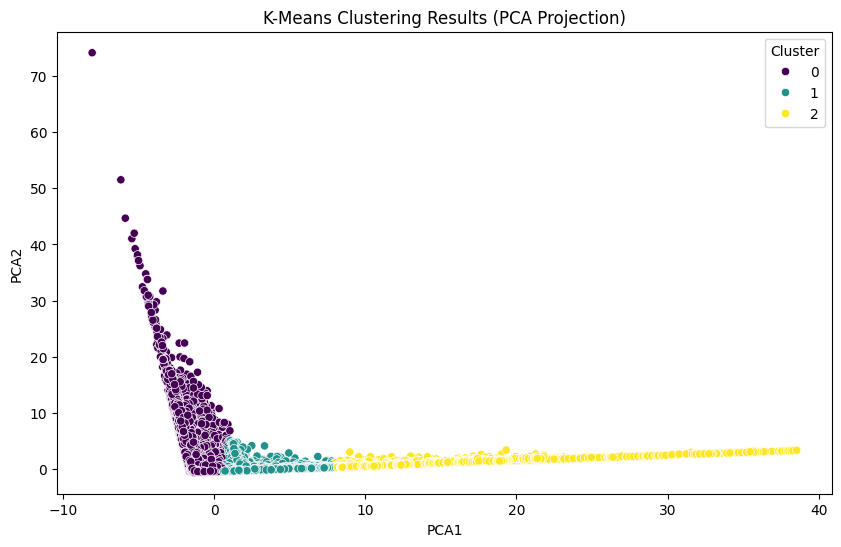

In [20]:
# Scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=data_cleaned)
plt.title('K-Means Clustering Results (PCA Projection)')
plt.show()

## Analysis

In [22]:
# Cluster analysis
cluster_means = data_cleaned.groupby('Cluster')[numeric_cols].mean()
print("\nCluster Centers:\n", cluster_means)


Cluster Centers:
                open        high         low       close        volume
Cluster                                                              
0         57.657230   58.191405   57.116388   57.671094  4.887251e+06
1        171.307021  172.836134  169.737931  171.340599  1.558439e+06
2        822.230107  829.006053  814.845004  822.145312  1.401130e+06
